In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import dask.array as da
from scipy.signal import find_peaks

import waveformFileClass as wf
import triggerFileClass as tf
import basicFunctions as bf
from tqdm import tqdm

C:\Users\divad\OneDrive\Documents\Python Scripts\datafilereadingscripts\basicFunctions.py:260: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if rounding is 'int':


In [2]:
#first load in the pixel mapping
fileDirectory = 'C:\\Users\\divad\\OneDrive\\Documents\\LANLData\\'
tempMap = np.loadtxt(fileDirectory + 'BoardChannelToPixelMap.csv', delimiter=',', skiprows = 1, dtype=[('bc', np.int32), ('pixel', np.int32)])
mapping = np.zeros(len(tempMap), dtype=[('bc', np.int32), ('pixel', np.int32)])
for i in range(len(tempMap)):
	mapping[i]['bc'], mapping[i]['pixel'] = tempMap[i]

In [3]:
names = ['ScopeRun69_0.scope', 'ScopeRun69_1.scope', 'ScopeRun69_2.scope', 'ScopeRun69_3.scope', 'ScopeRun69_4.scope', 'ScopeRun69_5.scope', 'ScopeRun69_6.scope']
filenames = []
for name in names:
	filenames.append(fileDirectory + name)
data = wf.waveformFile(filenames, pixelMapping = mapping)

In [4]:
hist = np.zeros(127)
for i in range(0, 127):
	pixel = data.getBC(i)
	if pixel is None:
		hist[i] = 0
	else:
		hist[i] = len(pixel)
outHist = np.zeros(len(hist))
for i in range(len(hist)):
	pixel = mapping['pixel'][mapping['bc']==i]
	if pixel!= -1:
		outHist[pixel-1] = hist[i]

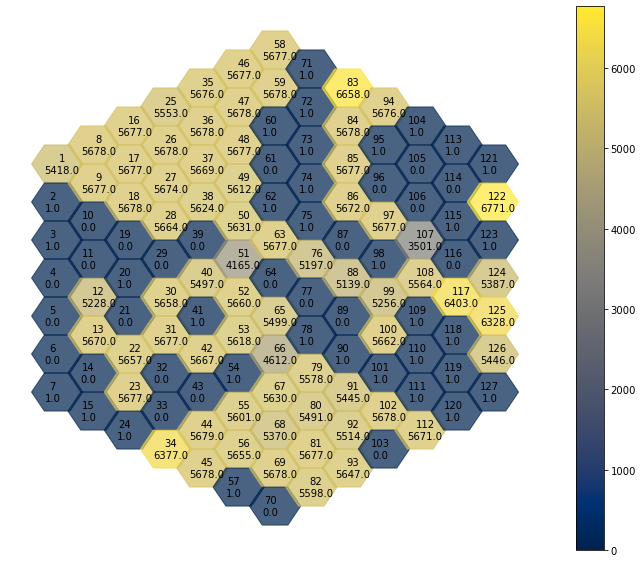

In [5]:
bf.plotOneDetector(outHist, alpha=0.7, showVal = True)

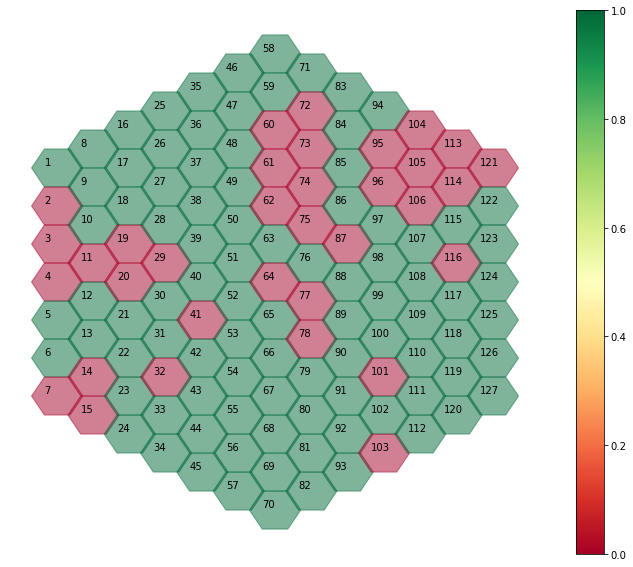

In [6]:
TruePixelMap = np.loadtxt(fileDirectory+'truePixelMap.txt', dtype=int)

unpowered = [4, 5, 7, 12, 15, 21]
unpoweredPixels = np.zeros(127)
curVal = 0
for i in range(0, 132):
	fet = int(i / 6)
	if fet not in unpowered:
		pixel = TruePixelMap[i]
		if pixel != -1:
			unpoweredPixels[pixel-1] = 1
			curVal += 1
bf.plotOneDetector(unpoweredPixels, alpha=0.5, showVal = False, cmap='RdYlGn')

In [7]:
results = data.determineEnergyTiming(method='trap', params=[100, 10, 1250], batchsize = 10000)

100%|██████████████████████████████████████████████████████████████████████████████████| 39/39 [02:52<00:00,  4.42s/it]


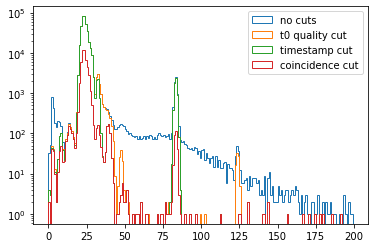

In [8]:
results.resetCuts()
plt.hist(results.data()['energy'], bins = np.arange(0, 200), histtype='step', label='no cuts')
results.defineCut('t0', 'between', 3000, 4000)
plt.hist(results.data()['energy'], bins = np.arange(0, 200), histtype='step', label='t0 quality cut')
results.defineCut('timestamp', '>', 2.5E10) #timestamp cut to get past the weird change in amplitude
plt.hist(results.data()['energy'], bins = np.arange(0, 200), histtype='step', label='timestamp cut')
results.defineCut('timestamp', 'coincidence', 100)#first do the coincidence cut to remove the pulser peak
plt.hist(results.data()['energy'], bins = np.arange(0, 200), histtype='step', label='coincidence cut')
plt.yscale('log')
plt.legend()
plt.show()

<ipython-input-9-9be17c96c682>:29: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


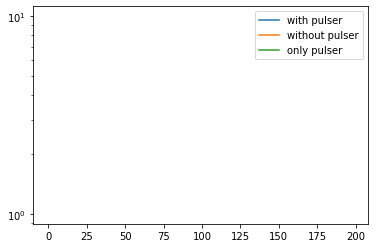

<ipython-input-9-9be17c96c682>:29: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


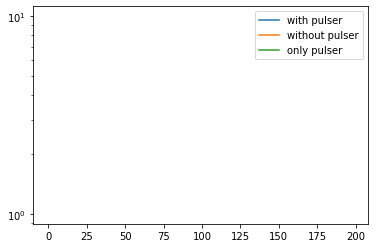

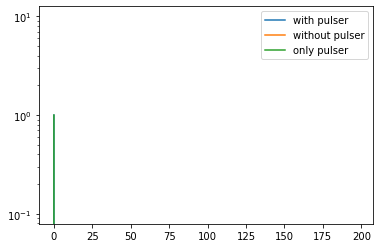

<ipython-input-9-9be17c96c682>:29: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


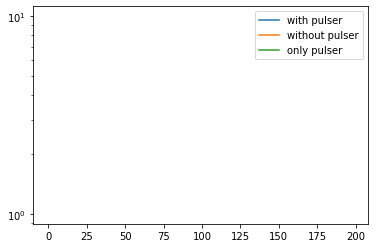

<ipython-input-9-9be17c96c682>:29: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


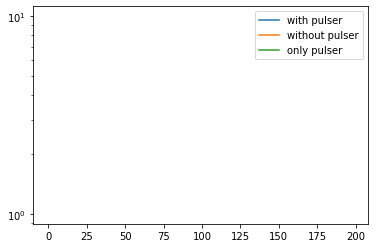

<ipython-input-9-9be17c96c682>:29: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


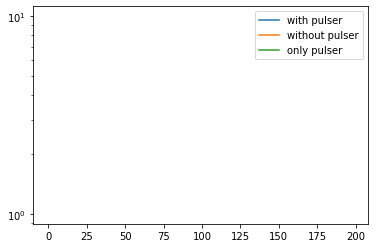

<ipython-input-9-9be17c96c682>:29: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


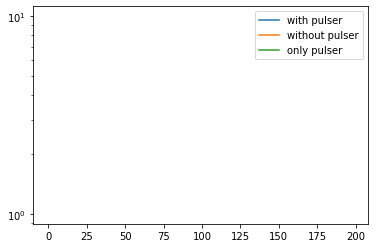

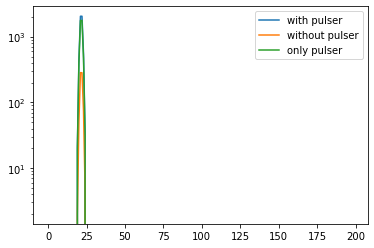

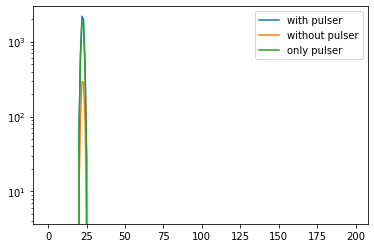

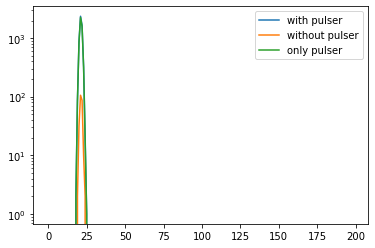

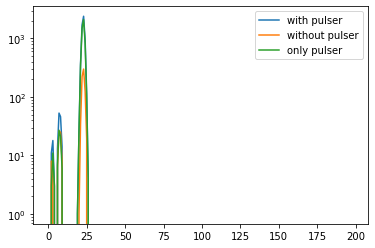

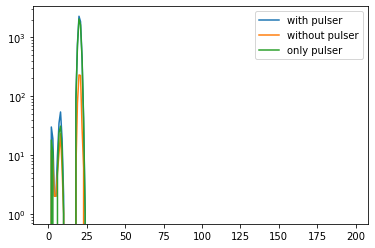

<ipython-input-9-9be17c96c682>:29: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


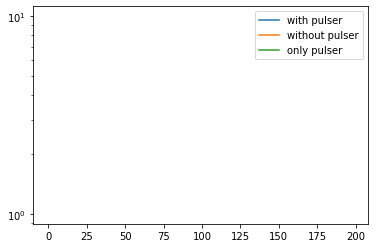

<ipython-input-9-9be17c96c682>:29: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


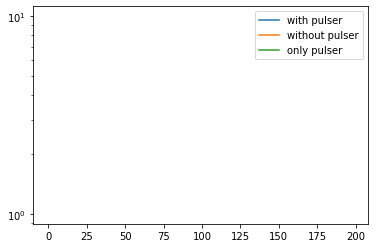

<ipython-input-9-9be17c96c682>:29: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


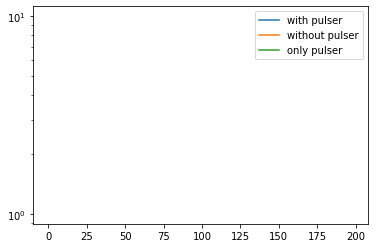

<ipython-input-9-9be17c96c682>:29: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


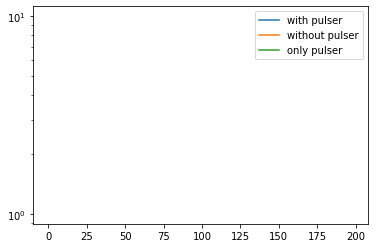

<ipython-input-9-9be17c96c682>:29: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


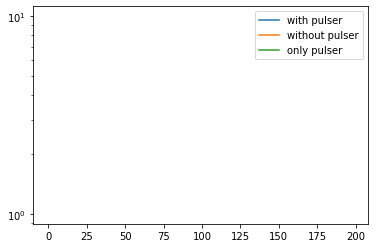

<ipython-input-9-9be17c96c682>:29: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


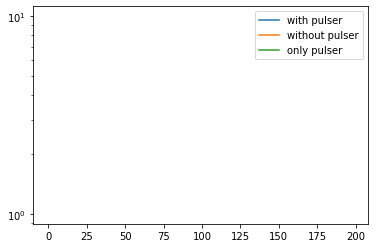

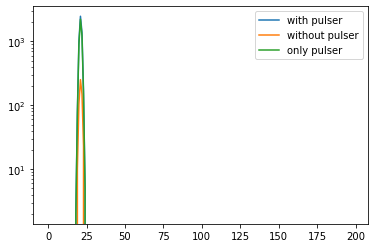

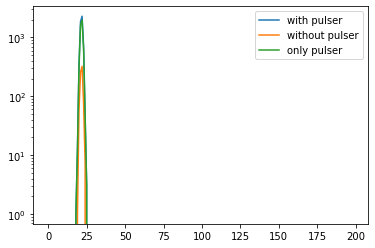

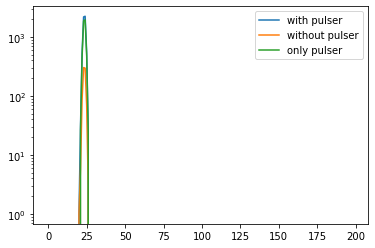

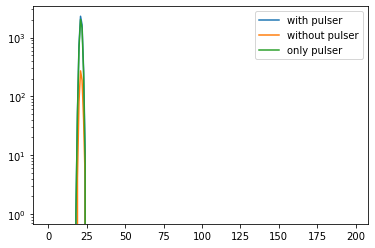

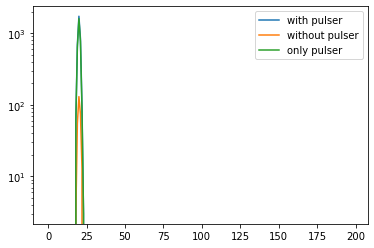

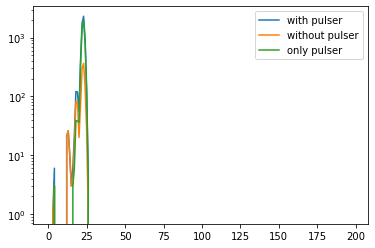

<ipython-input-9-9be17c96c682>:29: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


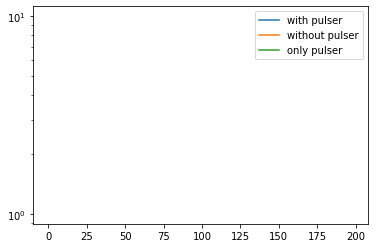

<ipython-input-9-9be17c96c682>:29: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


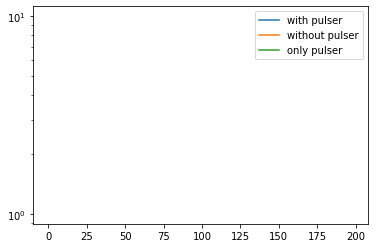

<ipython-input-9-9be17c96c682>:29: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


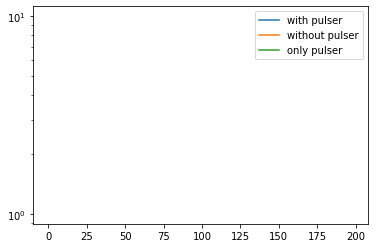

<ipython-input-9-9be17c96c682>:29: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


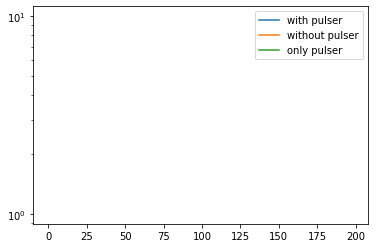

<ipython-input-9-9be17c96c682>:29: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


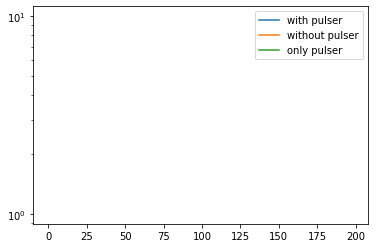

<ipython-input-9-9be17c96c682>:29: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


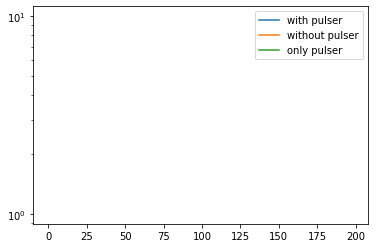

<ipython-input-9-9be17c96c682>:29: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


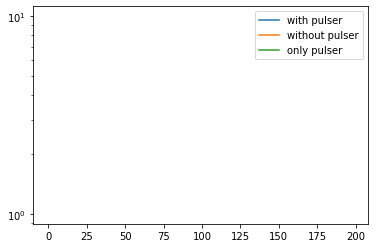

<ipython-input-9-9be17c96c682>:29: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


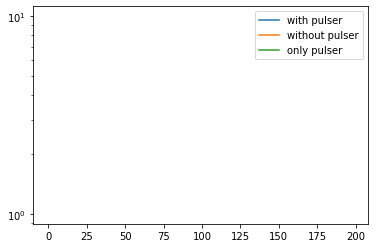

<ipython-input-9-9be17c96c682>:29: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


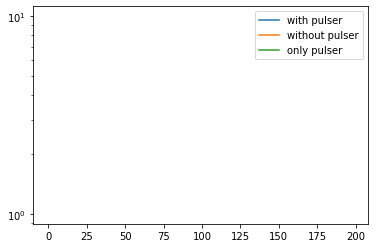

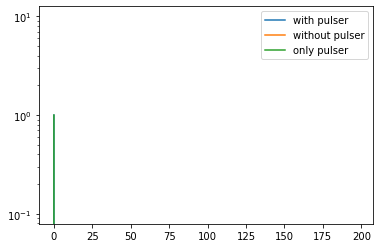

<ipython-input-9-9be17c96c682>:29: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


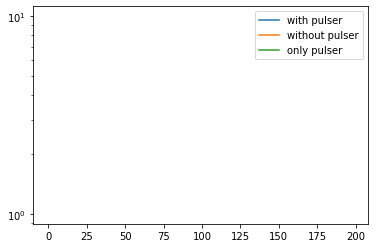

<ipython-input-9-9be17c96c682>:29: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


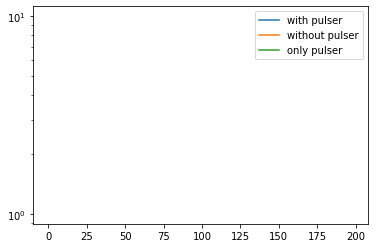

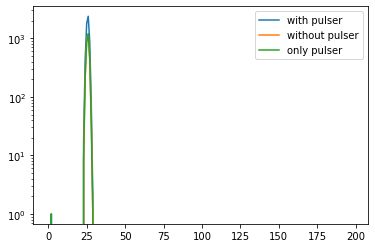

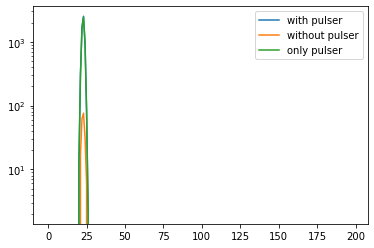

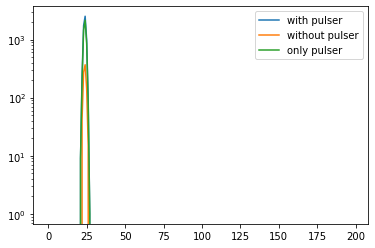

<ipython-input-9-9be17c96c682>:29: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


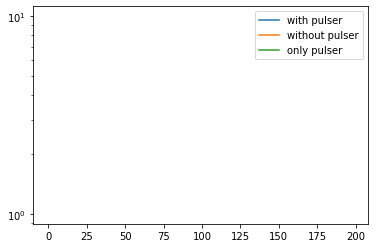

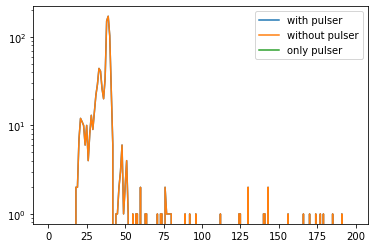

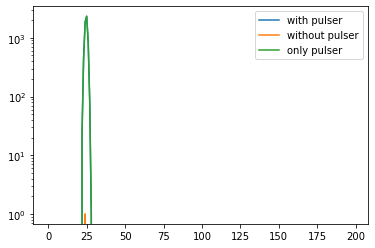

<ipython-input-9-9be17c96c682>:29: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


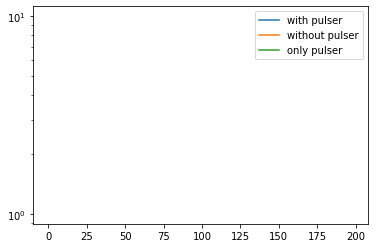

<ipython-input-9-9be17c96c682>:29: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


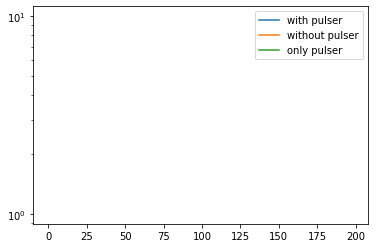

<ipython-input-9-9be17c96c682>:29: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


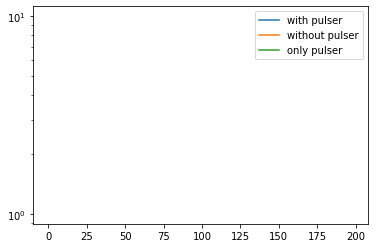

<ipython-input-9-9be17c96c682>:29: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


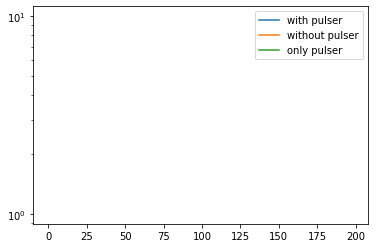

<ipython-input-9-9be17c96c682>:29: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


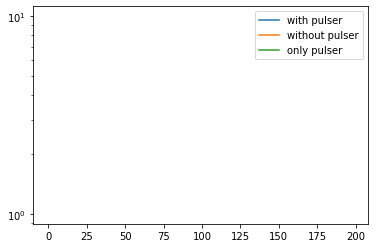

<ipython-input-9-9be17c96c682>:29: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


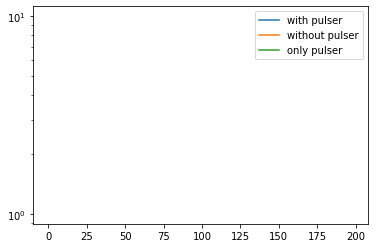

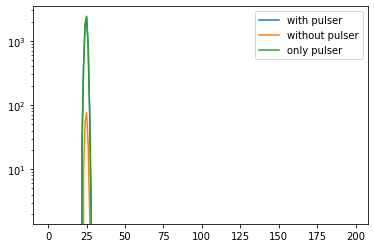

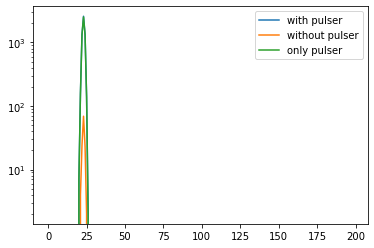

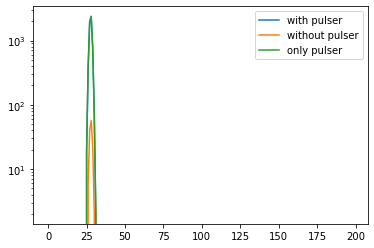

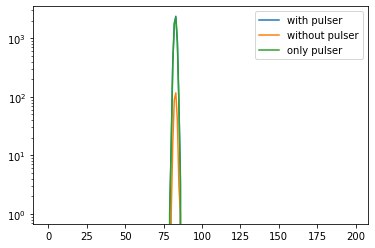

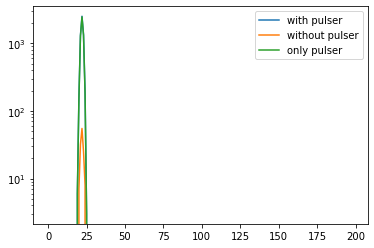

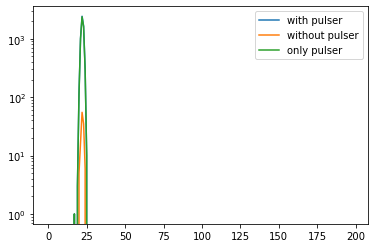

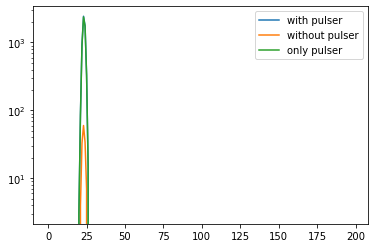

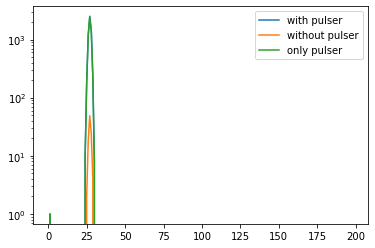

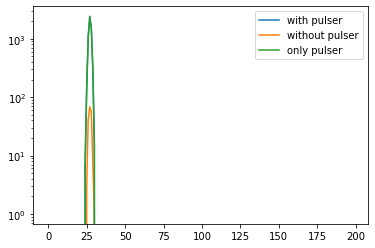

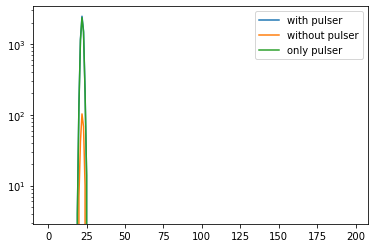

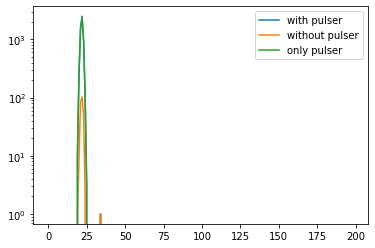

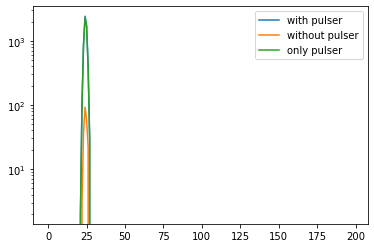

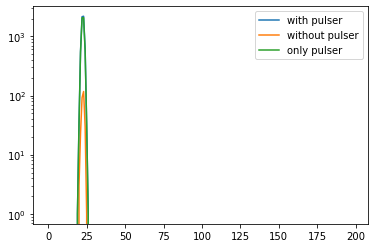

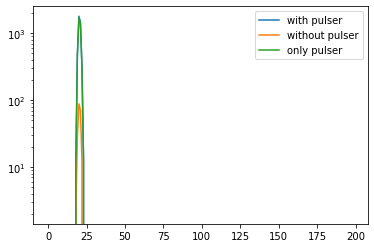

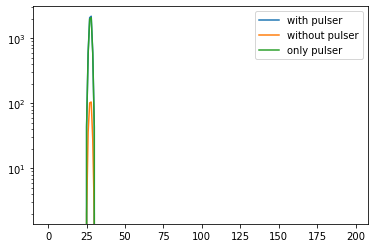

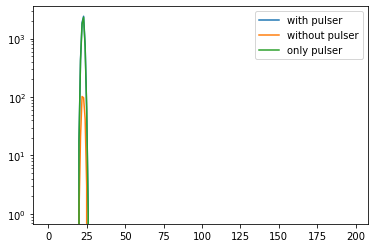

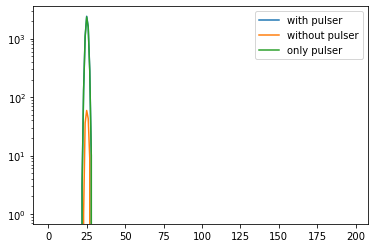

<ipython-input-9-9be17c96c682>:29: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


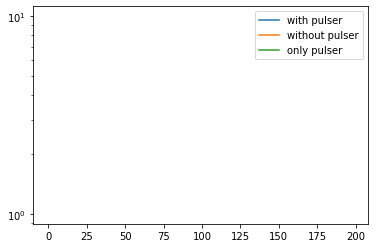

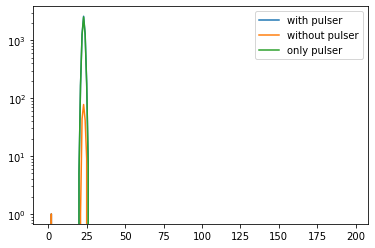

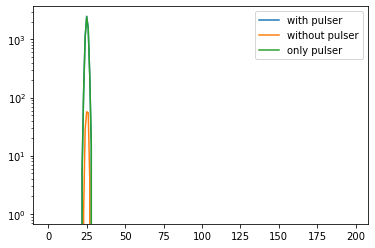

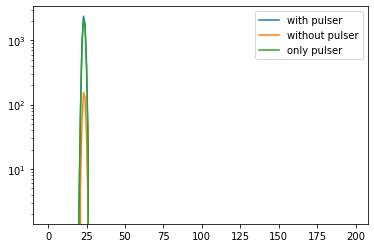

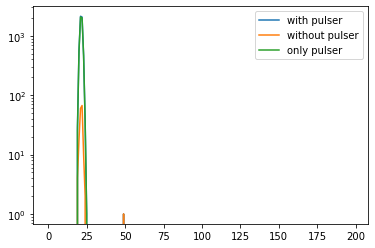

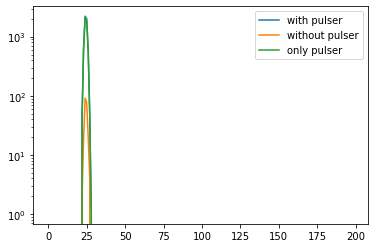

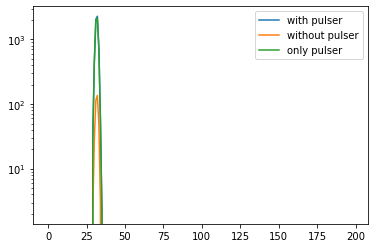

<ipython-input-9-9be17c96c682>:29: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


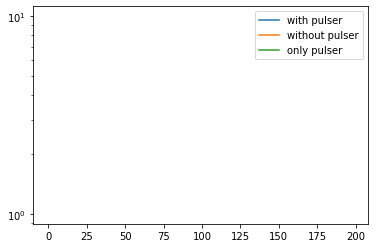

<ipython-input-9-9be17c96c682>:29: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


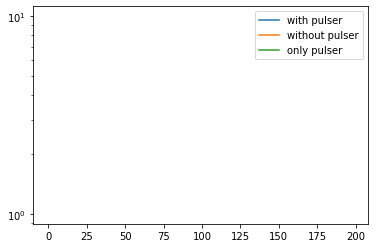

<ipython-input-9-9be17c96c682>:29: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


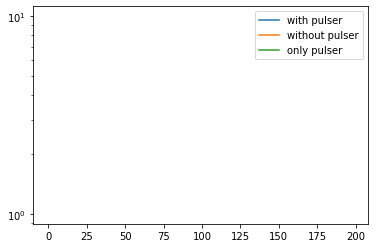

<ipython-input-9-9be17c96c682>:29: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


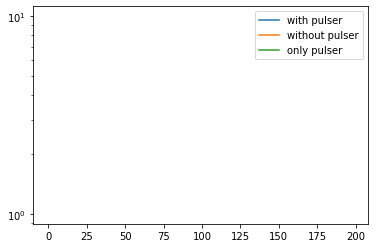

<ipython-input-9-9be17c96c682>:29: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


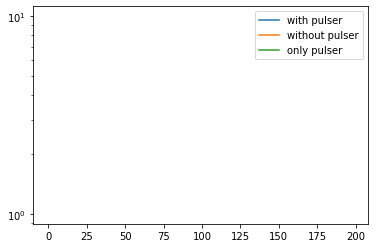

<ipython-input-9-9be17c96c682>:29: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


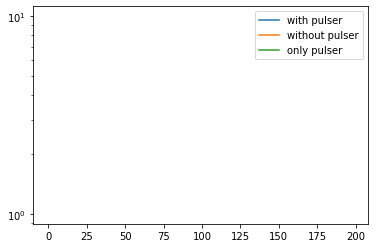

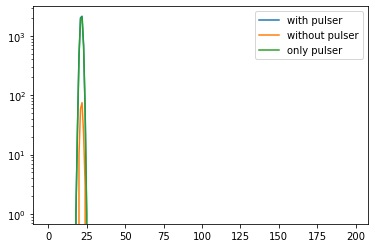

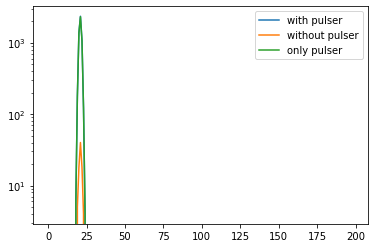

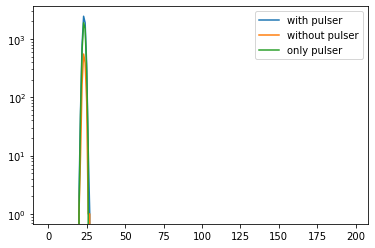

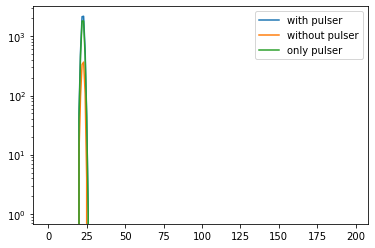

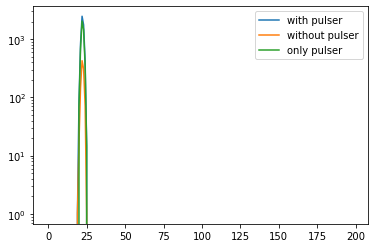

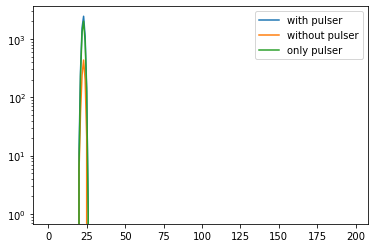

<ipython-input-9-9be17c96c682>:29: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


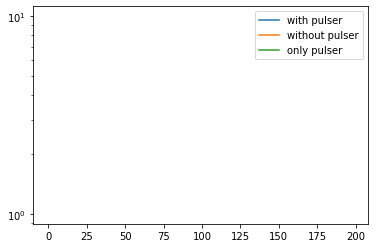

<ipython-input-9-9be17c96c682>:29: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


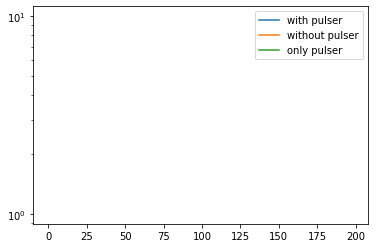

<ipython-input-9-9be17c96c682>:29: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


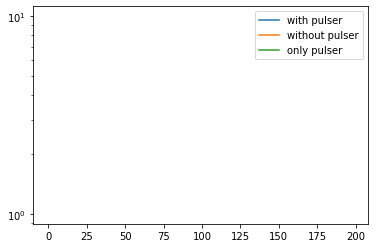

<ipython-input-9-9be17c96c682>:29: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


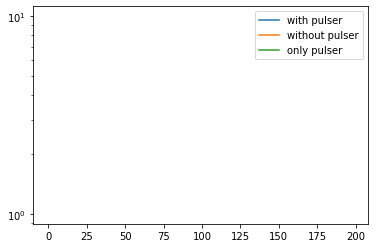

<ipython-input-9-9be17c96c682>:29: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


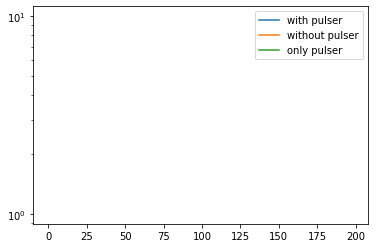

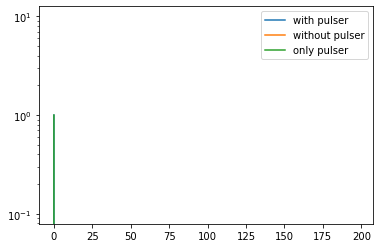

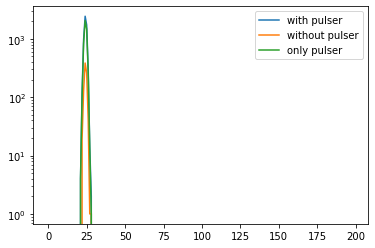

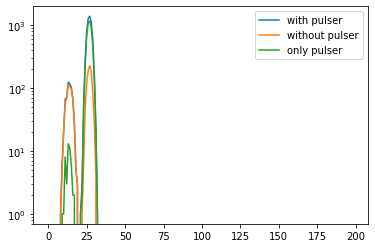

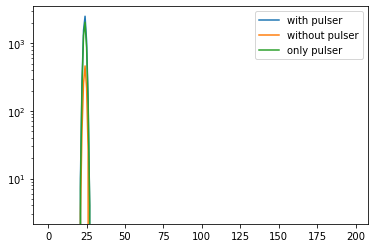

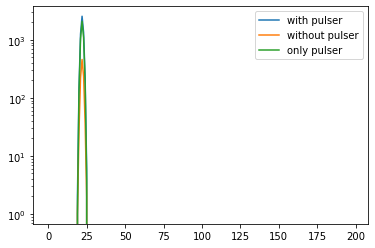

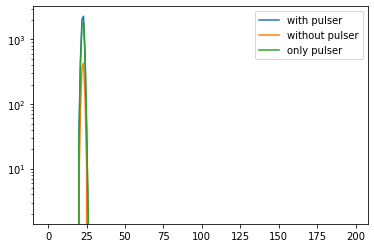

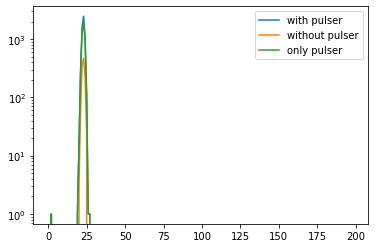

<ipython-input-9-9be17c96c682>:29: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


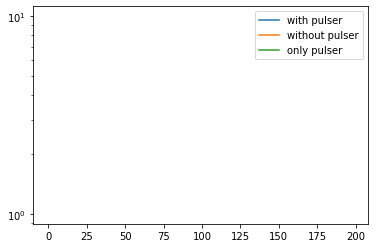

<ipython-input-9-9be17c96c682>:29: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


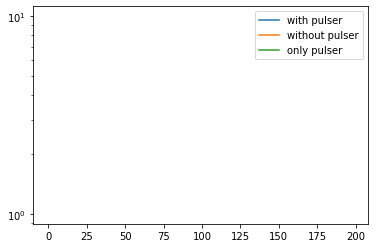

<ipython-input-9-9be17c96c682>:29: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


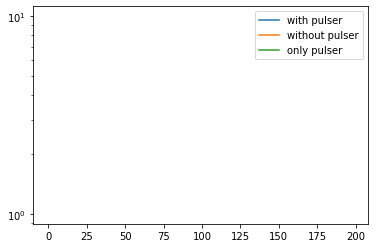

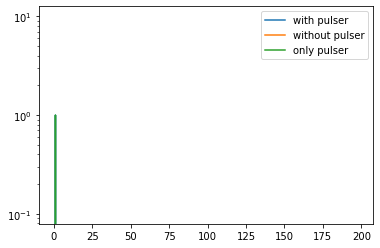

<ipython-input-9-9be17c96c682>:29: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


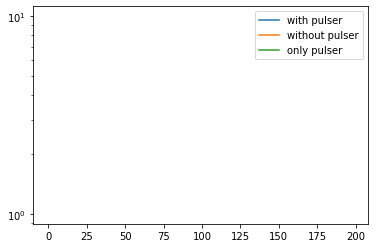

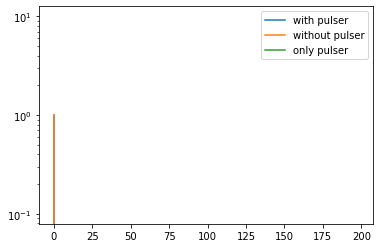

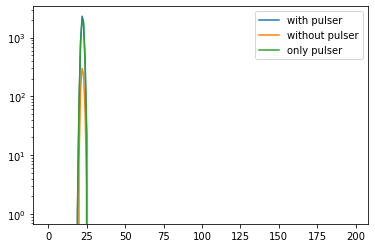

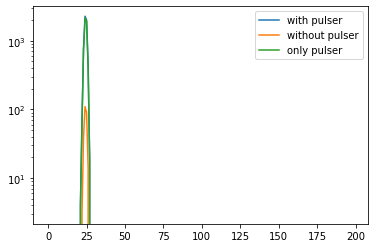

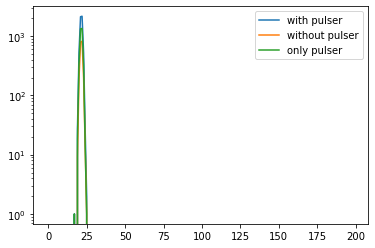

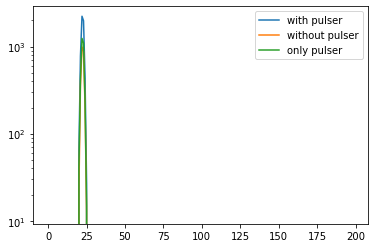

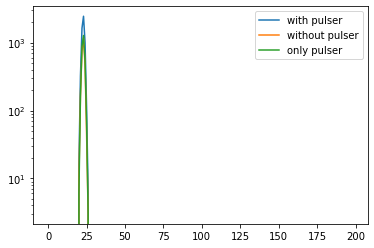

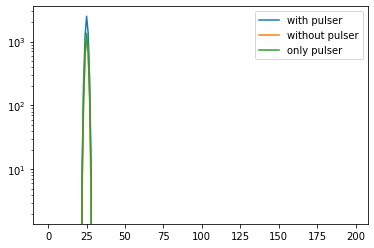

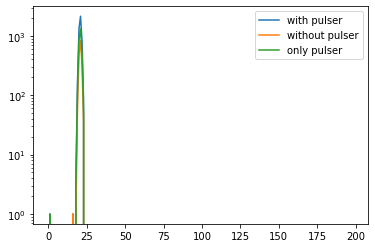

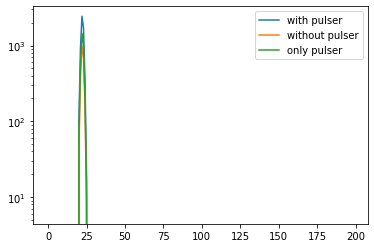

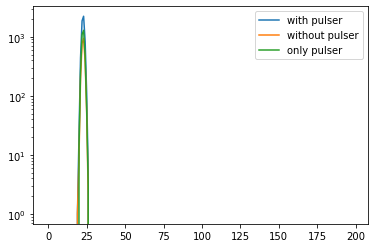

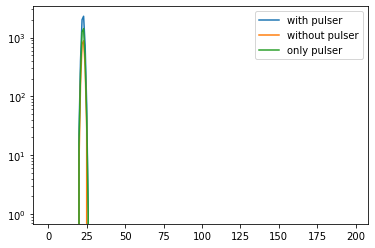

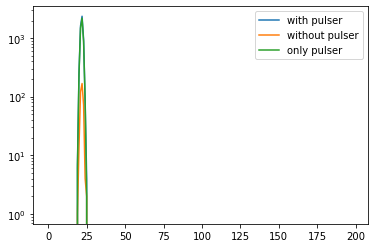

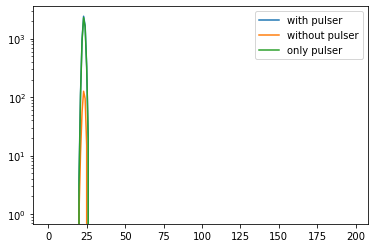

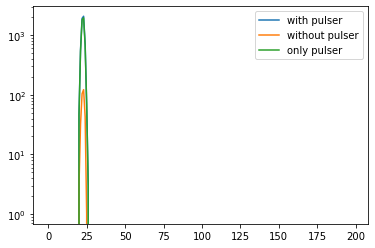

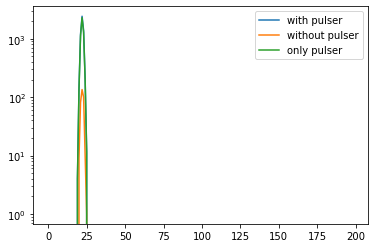

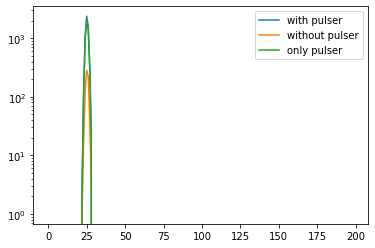

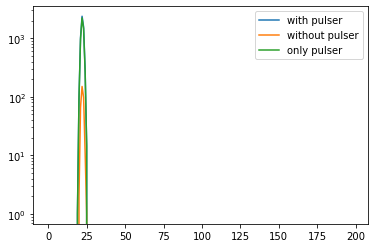

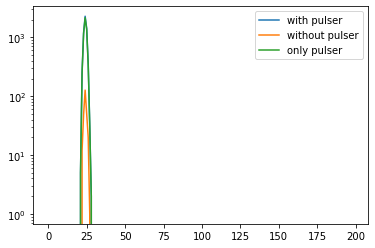

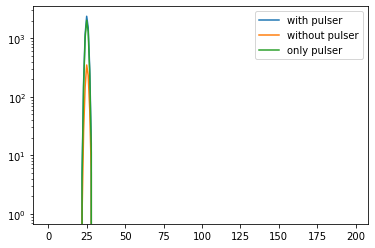

<ipython-input-9-9be17c96c682>:29: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


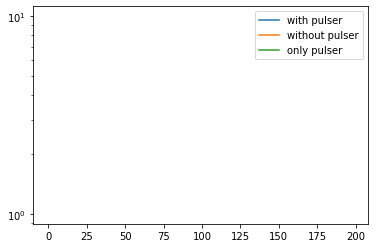

<ipython-input-9-9be17c96c682>:29: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


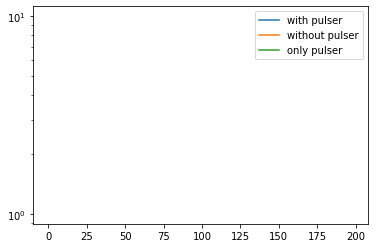

<ipython-input-9-9be17c96c682>:29: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


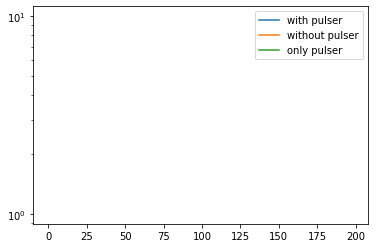

<ipython-input-9-9be17c96c682>:29: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


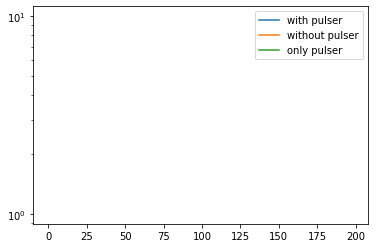

<ipython-input-9-9be17c96c682>:29: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


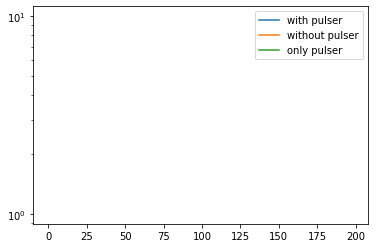

<ipython-input-9-9be17c96c682>:29: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


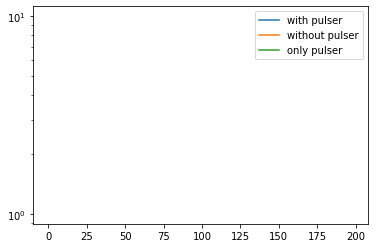

<ipython-input-9-9be17c96c682>:29: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


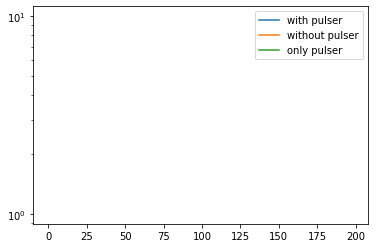

<ipython-input-9-9be17c96c682>:29: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


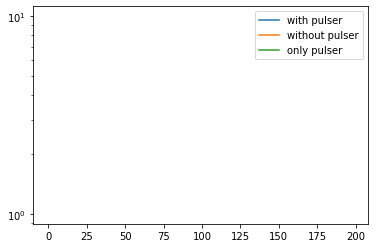

In [9]:
hists = []
peaks = []
for i in range(128):
	board = int(i/8)
	channel = i % 8
	results.resetCuts()
	results.defineCut('bc', [board, channel])
	if results.data() is not None:
		results.resetCuts()
		results.defineCut('timestamp', '>', 2.5E10)
		results.defineCut('t0', 'between', 3000, 4000) #data quality cut, good triggers are in this window
		results.defineCut('timestamp', 'coincidence', 1000)#first do the coincidence cut to remove the pulser peak
		results.defineCut('bc', [board, channel])
		noPulser = results.data()['energy']
		results.resetCuts()
		results.defineCut('timestamp', '>', 2.5E10)
		results.defineCut('bc', [board, channel])
		results.defineCut('t0', 'between', 3000, 4000) #data quality cut
		withPulser = results.data()['energy']
		bins = np.arange(0, 200)
		noPulserHist = np.histogram(noPulser, bins = bins)[0]
		withPulserHist = np.histogram(withPulser, bins = bins)[0]
		peak = find_peaks(np.subtract(withPulserHist, noPulserHist))[0]
		hists.append(np.subtract(withPulserHist, noPulserHist))
		plt.plot(withPulserHist, label='with pulser')
		plt.plot(noPulserHist, label='without pulser')
		plt.plot(np.subtract(withPulserHist, noPulserHist), label='only pulser')
		plt.legend()
		plt.yscale('log')
		plt.show()
		peaks.append(peak)
	else:
		hists.append(None)
		peaks.append(None)

In [10]:
peakAmplitudes = []
for i in range(len(peaks)):
	if len(peaks[i]) != 0:
		#figure out the highest peak
		peaklocs = peaks[i]
		peakheights = hists[i][peaks[i]]
		print(peakheights)
		peakAmplitudes.append(peaklocs[np.argmax(peakheights)])
	else:
		peakAmplitudes.append(0)

[1770]
[1899]
[2260]
[  11   27 2101]
[  18   31 2055]
[2217]
[1972]
[1950]
[2030]
[1589]
[   3   39 1946]
[   1 1209]
[2439]
[2150]
[2330]
[2350]
[2519]
[2330]
[2268]
[2453]
[   1 2376]
[2372]
[   1 2475]
[2364]
[2357]
[2406]
[2326]
[2071]
[1703]
[2083]
[2311]
[2365]
[2542]
[2449]
[2220]
[2077]
[2134]
[2145]
[2067]
[2310]
[1900]
[1816]
[2038]
[2021]
[2060]
[   8   13 1149]
[2050]
[2093]
[1857]
[   1 1991]
[1]
[2009]
[2168]
[   1 1348]
[1246]
[1281]
[1346]
[   1 1309]
[1450]
[1286]
[1418]
[2197]
[2298]
[1965]
[2300]
[2091]
[2222]
[2159]
[2031]


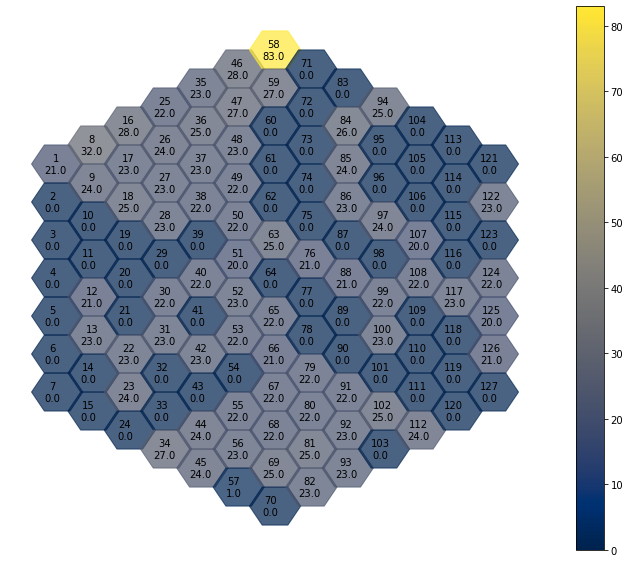

In [11]:
hist = np.zeros(127)
for i in range(0, 127):
	pixel = data.getBC(i)
	if pixel is None:
		hist[i] = 0
	else:
		hist[i] = peakAmplitudes[i]
outHist = np.zeros(len(hist))
for i in range(len(hist)):
	pixel = mapping['pixel'][mapping['bc']==i]
	if pixel!= -1:
		outHist[pixel-1] = hist[i]
bf.plotOneDetector(outHist, alpha=0.7, showVal = True)

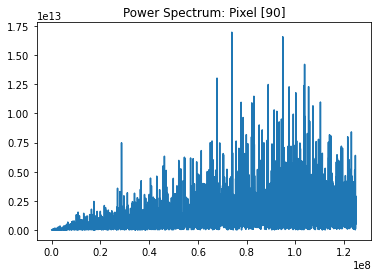

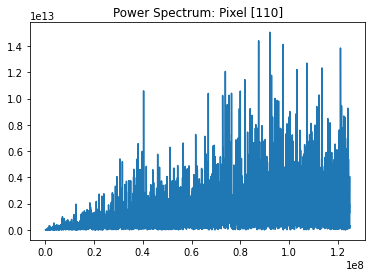

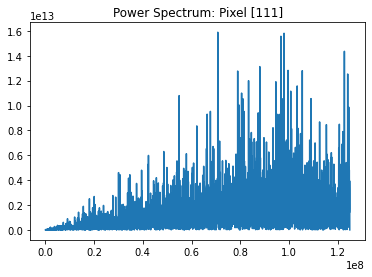

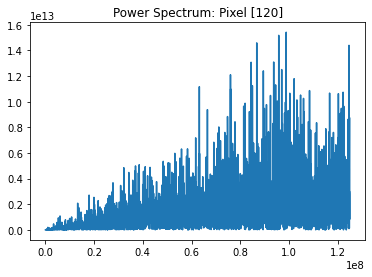

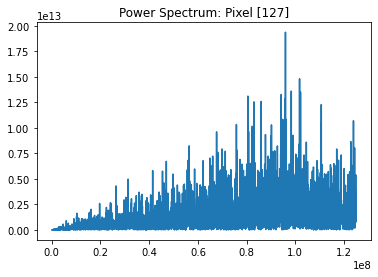

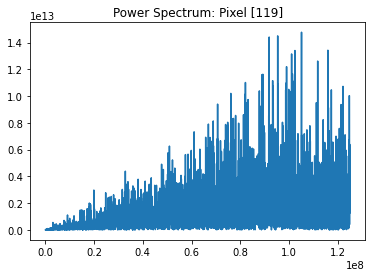

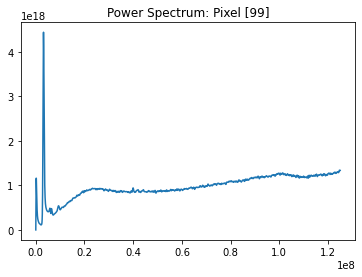

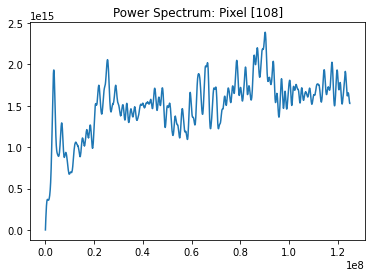

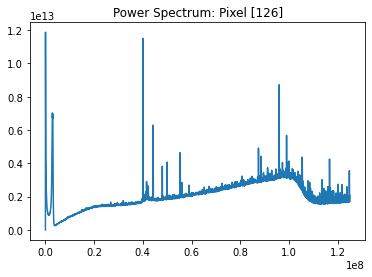

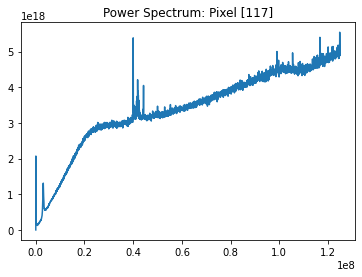

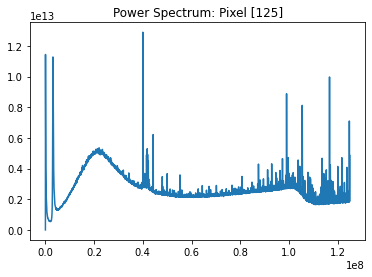

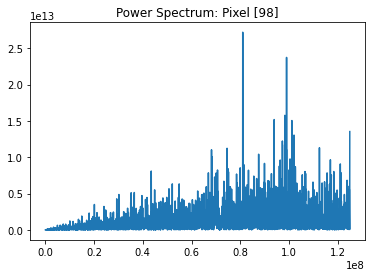

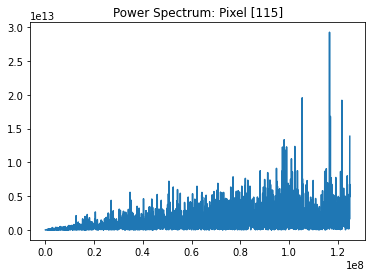

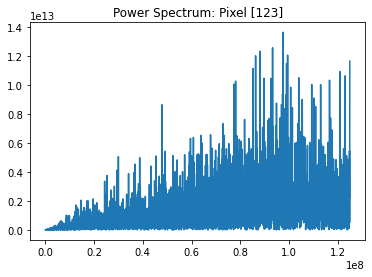

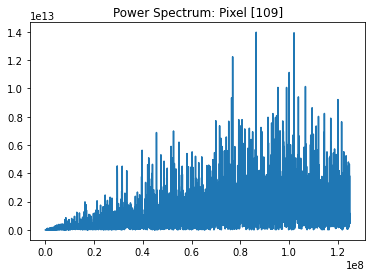

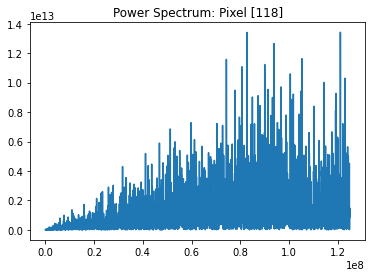

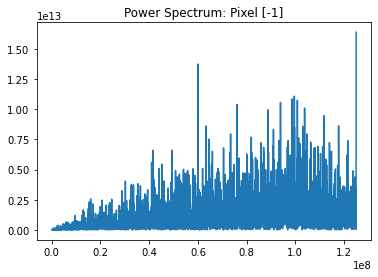

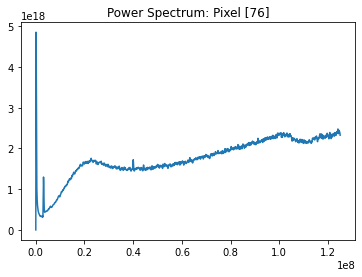

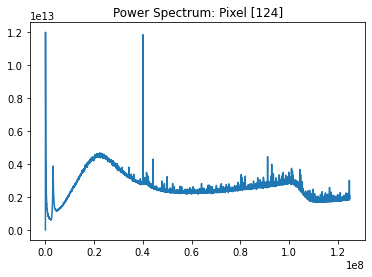

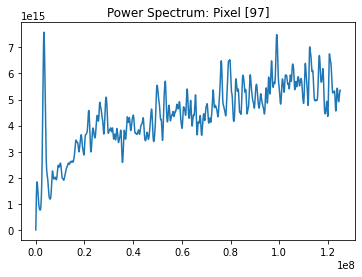

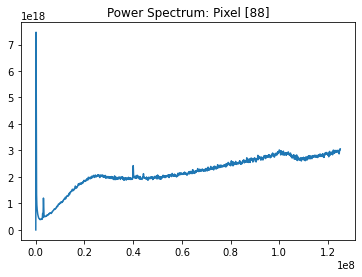

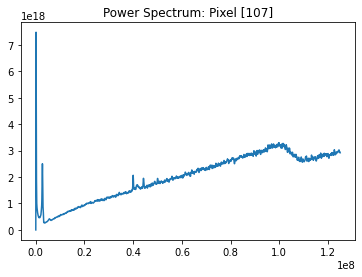

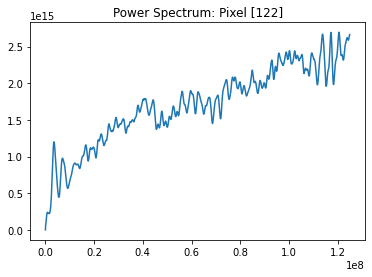

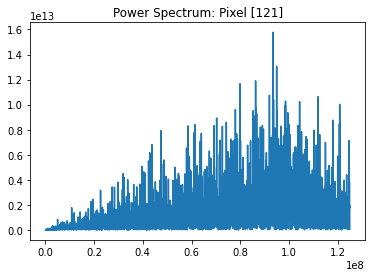

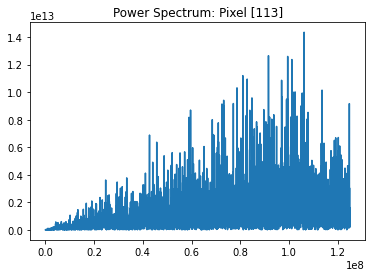

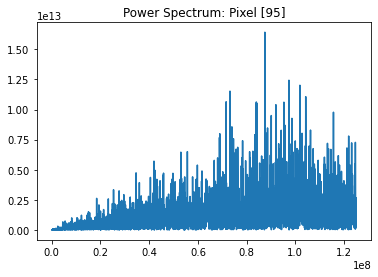

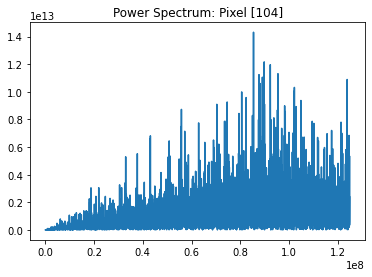

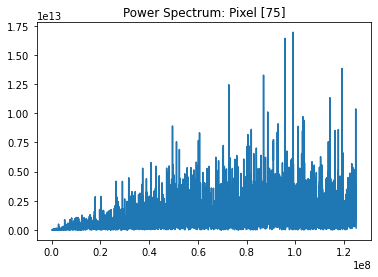

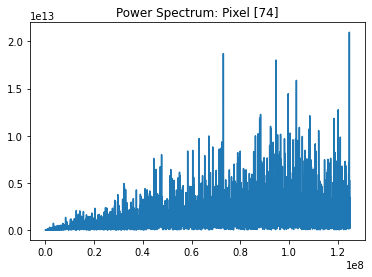

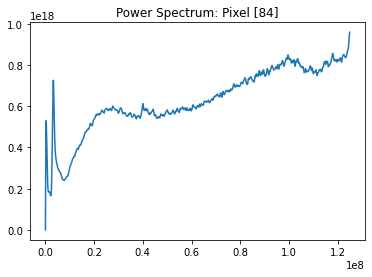

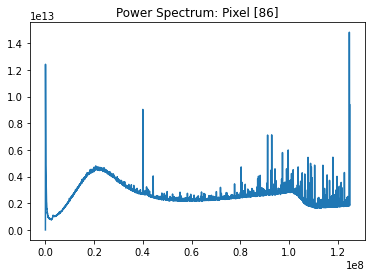

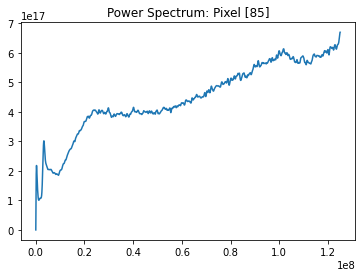

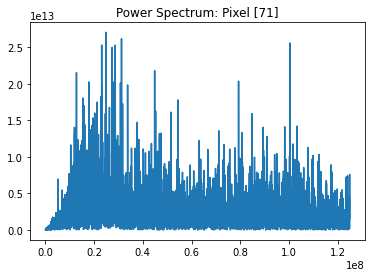

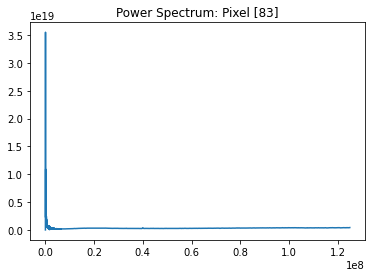

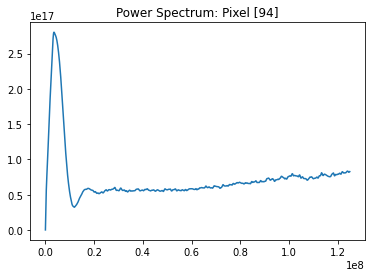

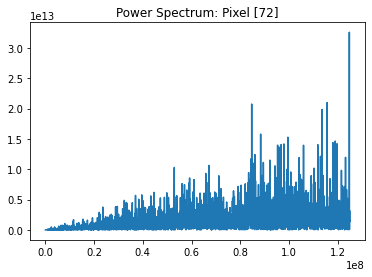

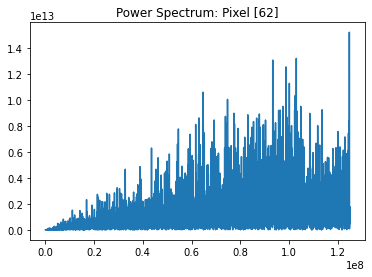

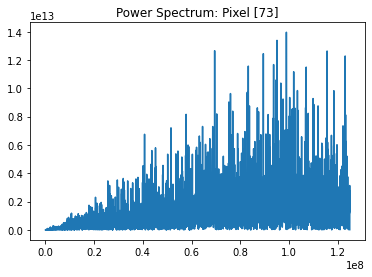

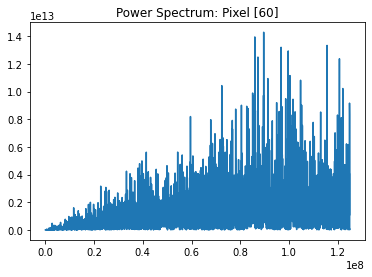

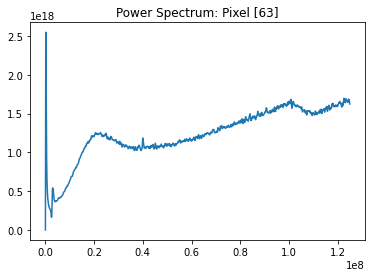

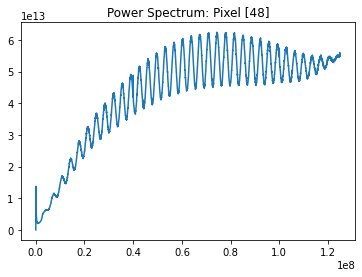

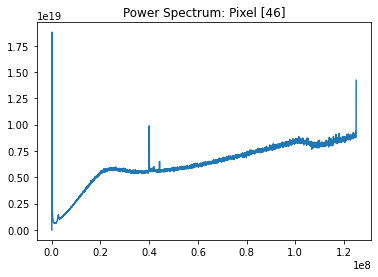

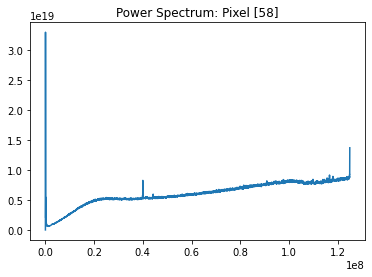

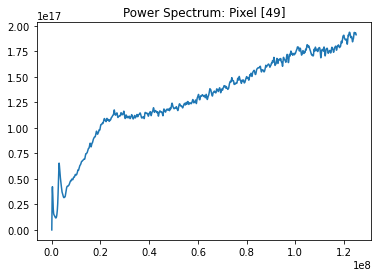

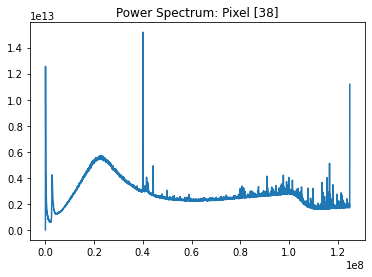

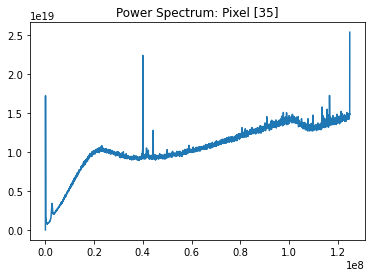

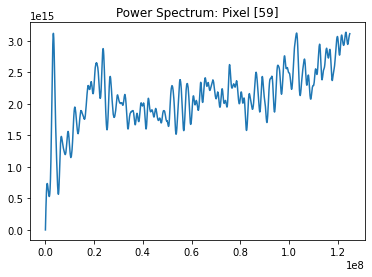

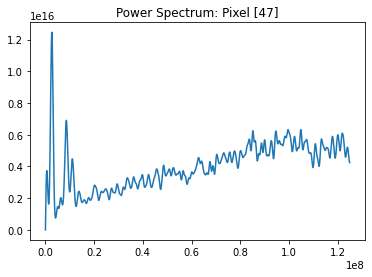

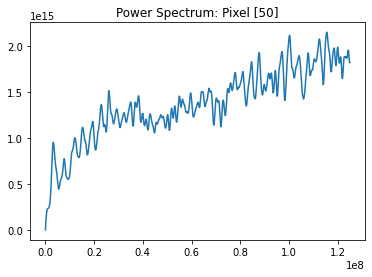

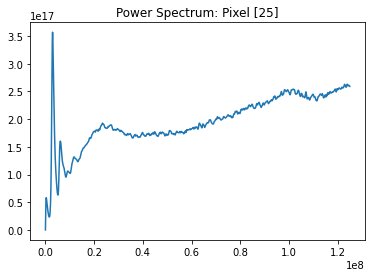

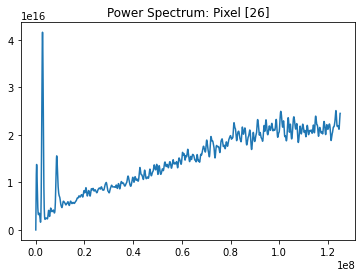

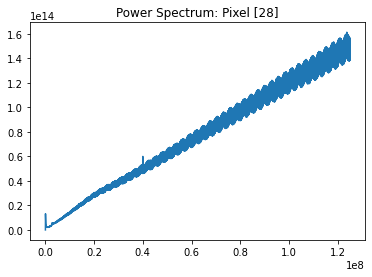

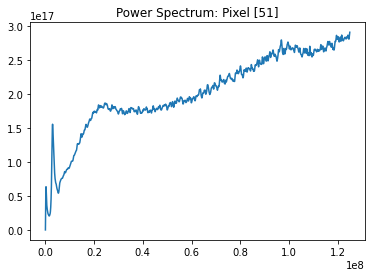

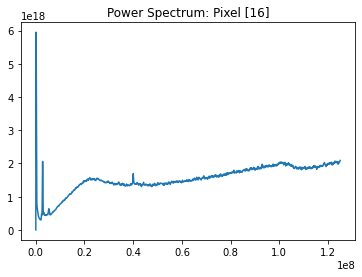

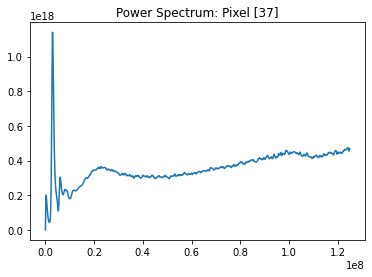

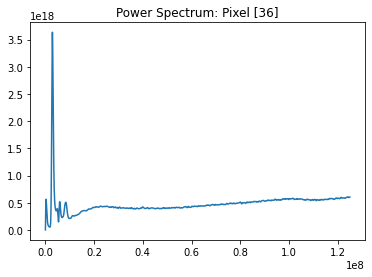

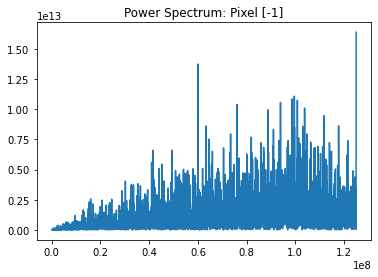

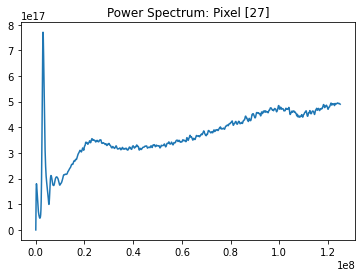

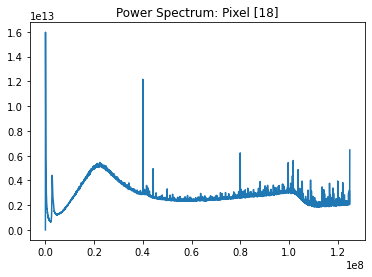

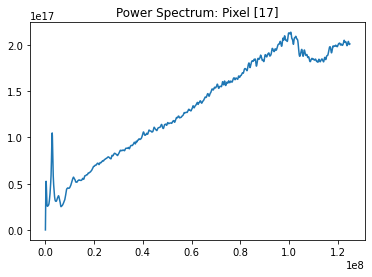

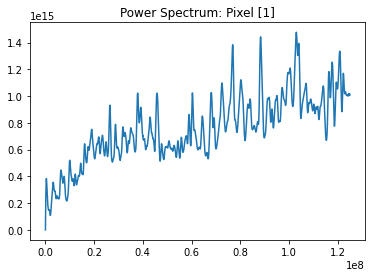

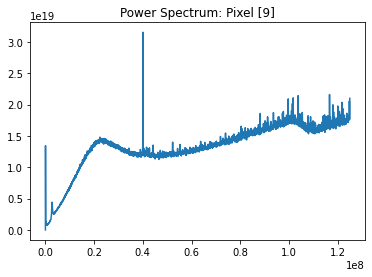

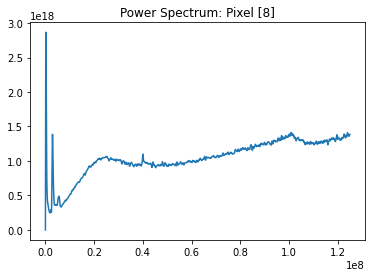

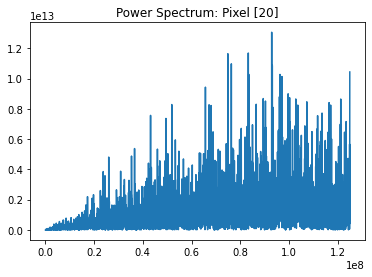

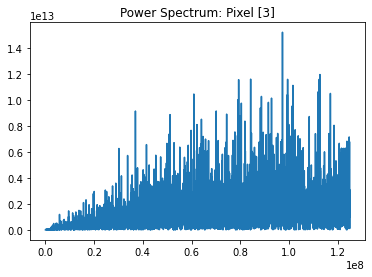

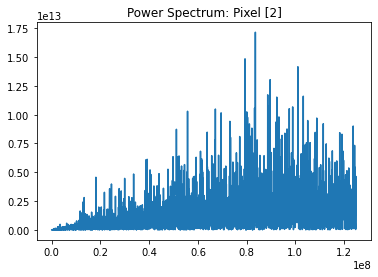

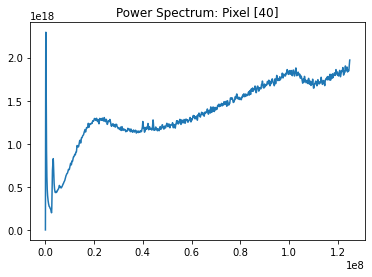

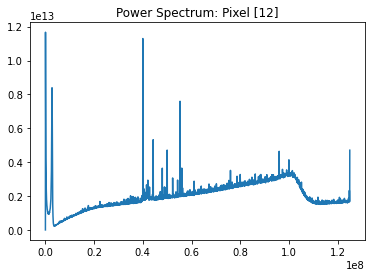

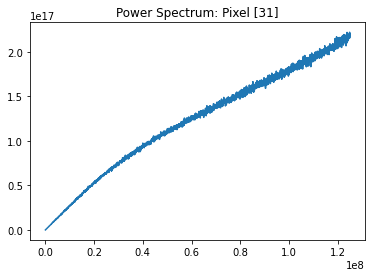

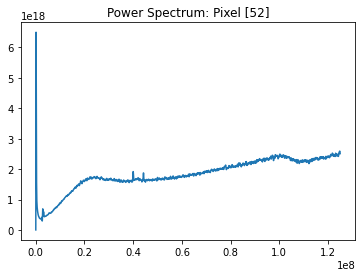

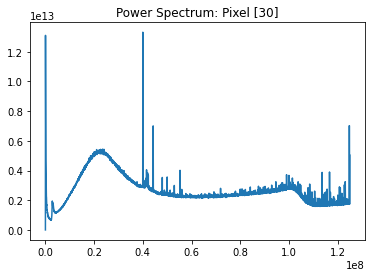

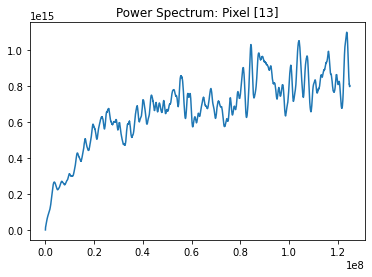

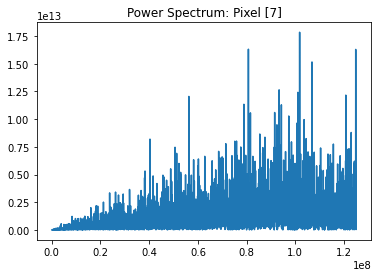

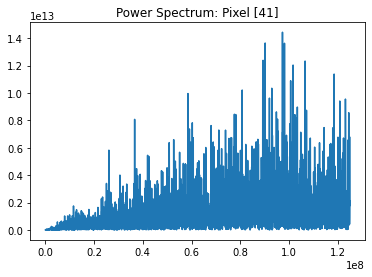

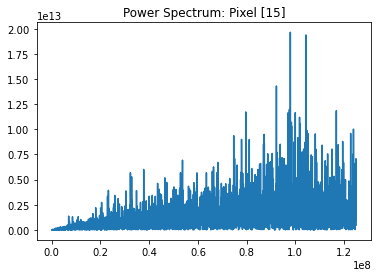

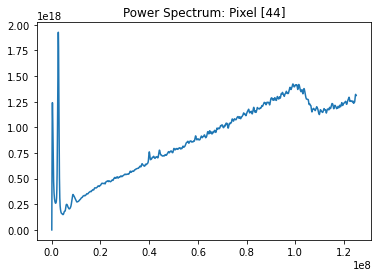

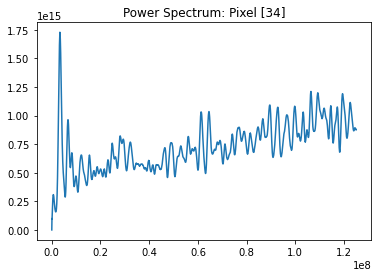

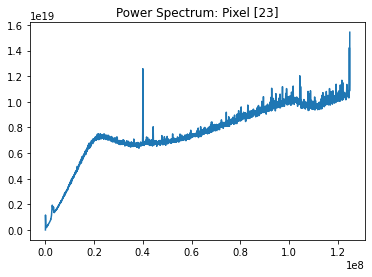

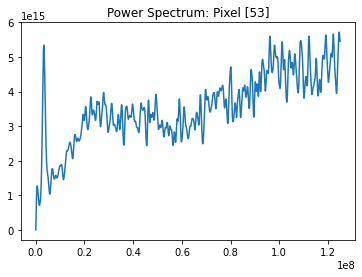

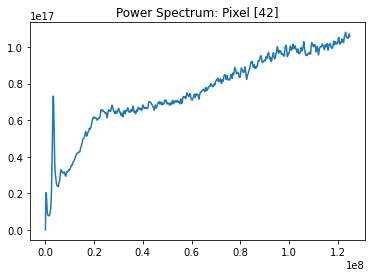

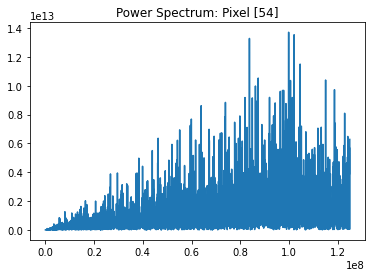

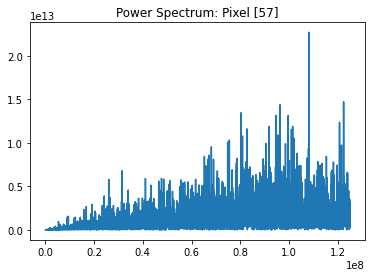

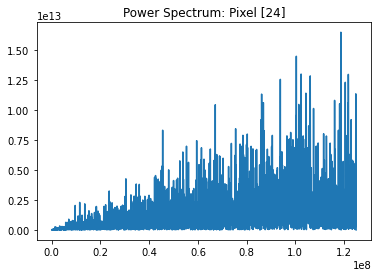

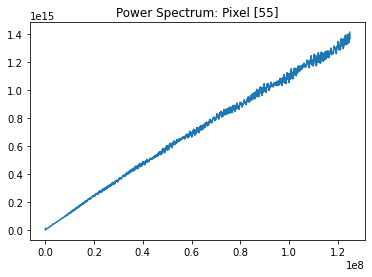

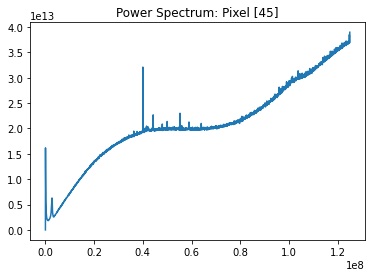

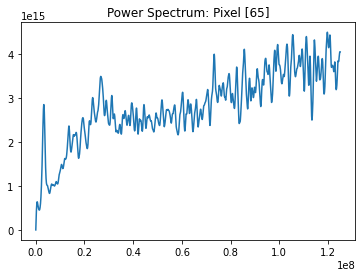

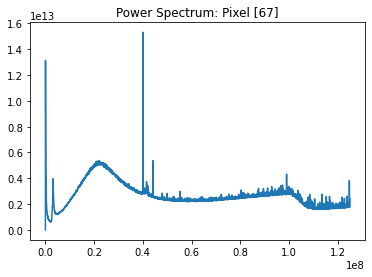

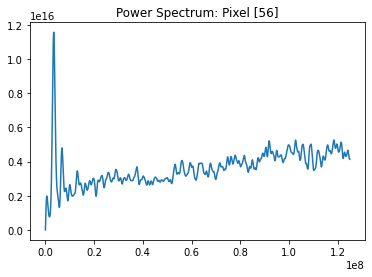

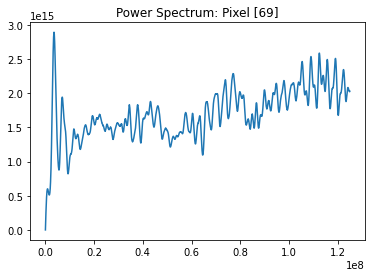

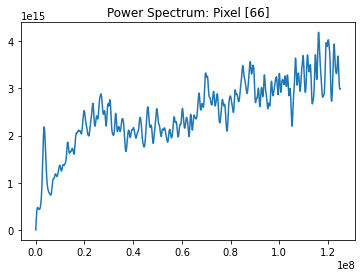

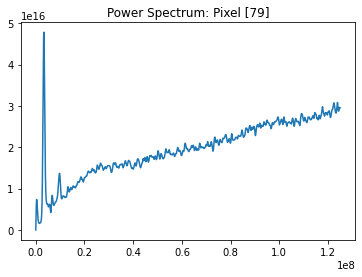

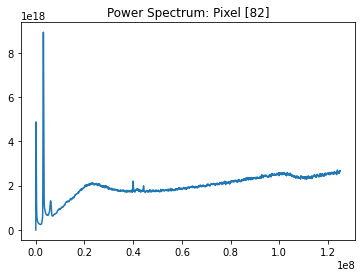

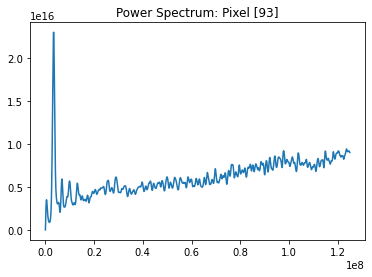

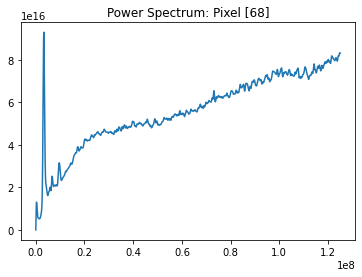

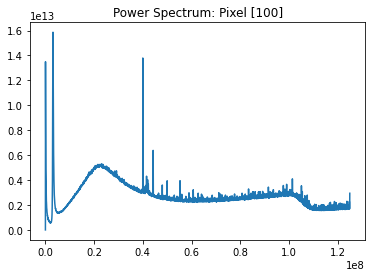

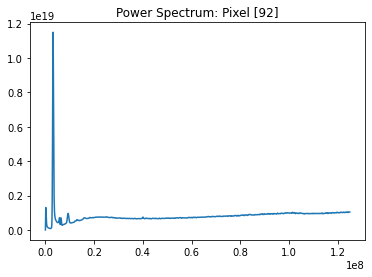

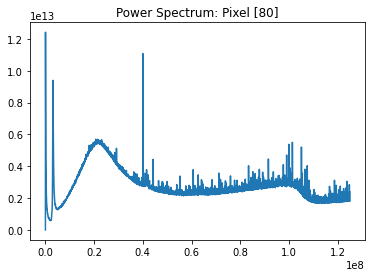

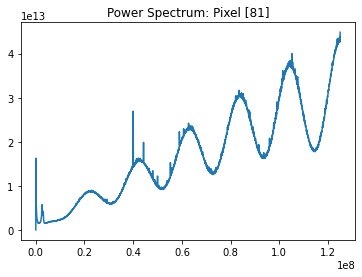

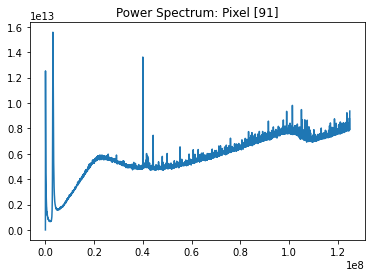

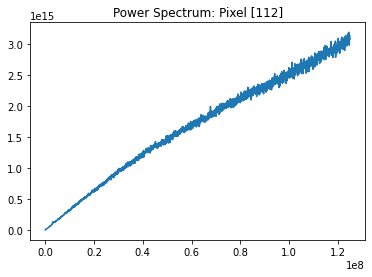

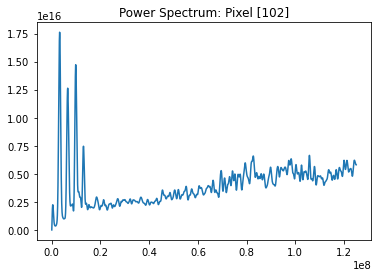

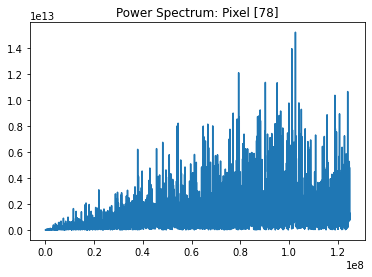

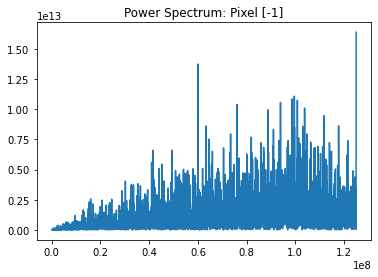

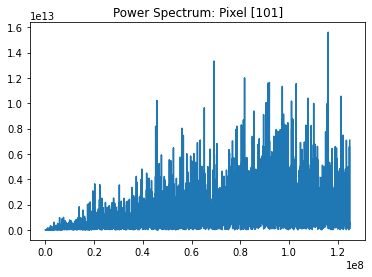

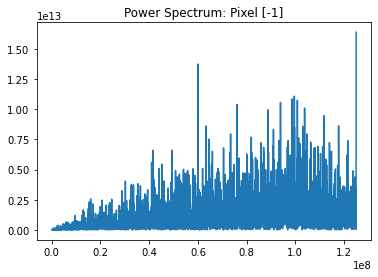

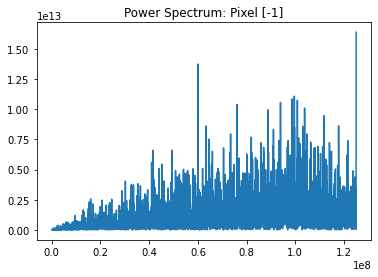

In [12]:
for i in range(127):
	pixel = mapping['pixel'][mapping['bc']==i]
	spec = data.generatePowerSpectra(pixel=pixel)
	if spec is not None:
		plt.plot(spec[0], spec[1])
		plt.title('Power Spectrum: Pixel '+str(pixel))
		plt.show()